# Feature Scaling and Normalization

## Introduction

Previously, you've learned about categorical variables, and about how multicollinearity in continuous variables might cause problems in our linear regression model. Before you start with the actual modeling section of multiple linear regression, it is important to talk about feature scaling and why it is important!

## Objectives
You will be able to:
* Understand the use cases for feature scaling and normalization 
* Understand min-max scaling, mean-normalization, log normalization and unit vectors

## Why is feature scaling and normalization important?

### (Approximately) normal features may yield better results

In the last lesson you saw how applying a log transform resulted in a model with a better $R^2$ value. The key there was that taking these log transforms resulted in having more "normal" data distributions for the input features!

### The variety in feature scales

Often, your dataset will contain features that largely vary in magnitudes. If you leave these magnitudes unchanged, coefficient sizes will largely fluctuate in magnitude as well. This can give the false impression that some variables are less important than others.

Even though this is not always a formal issue when estimating linear regression models, this *can* be an issue in more advanced machine learning models you'll see later. This is because most machine learning algorithms use Euclidean distance between two data points in their computations. Because of that, making sure that features have similar scales is formally required there. Some algorithms even require features to be **zero centric**.

A good rule of thumb is, however, to check your features for normality, and while you're at it, scale your features so they have similar magnitudes, even for a "simple" model like linear regression.

## Popular transformations

### Log transformation

As seen in the previous lesson, a log transformation is a very useful tool when you have data that clearly does not follow a normal distribution. log transformation can help reducing skewness when you have skewed data, and can help reducing variability of data. 


### Min-max scaling

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings values between 0 and 1

### Standardization

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!

### Mean normalization
When performing mean normalization, you use the following formula:
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

The distribution will have values between -1 and 1, and a mean of 0.

### Unit vector transformation
 When performing unit vector transformations, you can create a new variable x' with a range [0,1]:
 
$$x'= \dfrac{x}{{||x||}}$$


Recall that the norm of x $||x||= \sqrt{(x_1^2+x_2^2+...+x_n^2)}$

## Applying Transformations to the auto-mpg Data

In [1]:
import pandas as pd
data = pd.read_csv("auto-mpg.csv")
data['horsepower'].astype(str).astype(int) # don't worry about this for now
data_pred= data.iloc[:,1:8]
data_pred.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


Let's have a look at our continuous features: "acceleration", "displacement", "horsepower", "weight". While you have seen that removing correlated features is often the best course of action, let's first get a sense of how you can transform each one of them!

In [1]:
data_pred[["acceleration", "displacement", "horsepower", "weight"]].hist(figsize  = [6, 6]);

NameError: name 'data_pred' is not defined

You can tell that skewness is an issue for most of our variables (except acceleration), and that some features e.g. weight are much bigger in scale than others!

Let's transform our data in two phases: first, let's try to make our data look more normal, and second, let's perform feature scaling to manage the difference in magnitude!

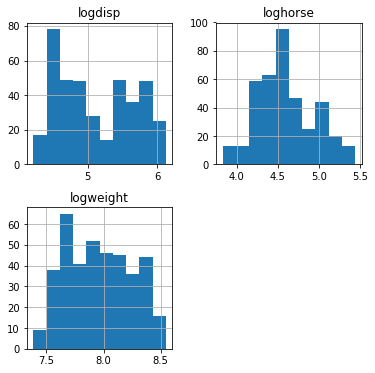

In [3]:
import numpy as np
data_log = pd.DataFrame([])
data_log["logdisp"] = np.log(data_pred["displacement"])
data_log["loghorse"] = np.log(data_pred["horsepower"])
data_log["logweight"] = np.log(data_pred["weight"])
data_log.hist(figsize  = [6, 6]);

Although you can't say our new variables look perfectly normal, there is clearly an improvement in terms of skewness. Now, let's perform Min-max scaling (on "acceleration"), standardization on "logdisp", mean normalization (on "loghorse") and another standardization (on "logweight").

In [2]:
acc = data_pred["acceleration"]
logdisp = data_log["logdisp"]
loghorse = data_log["loghorse"]
logweight = data_log["logweight"]

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled["acc"]= scaled_acc
data_cont_scaled["disp"]= scaled_disp
data_cont_scaled["horse"] = scaled_horse
data_cont_scaled["weight"] = scaled_weight

data_cont_scaled.hist(figsize  = [6, 6]);

NameError: name 'data_pred' is not defined

Great! You rescaled your features.

## Additional research

scikit-learn provides automatic tools to scale features, see, among others, `MinMaxScaler`, `StandardScaler`
and `Normalizer`. Have a look at these built-in functions and some code examples here: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing!

To learn more about feature scaling in general, you can have a look at this blogpost: https://sebastianraschka.com/Articles/2014_about_feature_scaling.html (up until "bottom-up approaches".

## Summary
In this lecture, you learned about why feature scaling is important, and *how* to transform your features.